In [1]:
import pandas as pd
import csv

In [2]:
url = 'https://covid19.ddc.moph.go.th/api/Cases/timeline-cases-all'

In [3]:
df = pd.read_json(url) #อ่าน data จาก url ที่เป็นไฟล์ json

In [4]:
df = df.to_csv("coviddata.csv", index = False) #แปลงเป็น csv เพื่อนำมาใช้ได้ง่ายขึ้น

In [5]:
file = pd.read_csv("coviddata.csv", parse_dates=["txn_date"])

In [6]:
file.info

<bound method DataFrame.info of       txn_date  new_case  total_case  new_case_excludeabroad  \
0   2021-04-01        26       28889                      21   
1   2021-04-02        58       28947                      45   
2   2021-04-03        84       29031                      69   
3   2021-04-04        96       29127                      87   
4   2021-04-05       194       29321                     182   
..         ...       ...         ...                     ...   
329 2022-02-24     23557     2794350                   23329   
330 2022-02-25     24932     2819282                   24765   
331 2022-02-26     25615     2844897                   25449   
332 2022-02-27     24719     2869616                   24599   
333 2022-02-28     22311     2891927                   22175   

     total_case_excludeabroad  new_death  total_death  new_recovered  \
0                       25787          0           94            122   
1                       25832          0           94  

In [7]:
file = pd.DataFrame(file)

In [8]:
file['Number'] = file.index - file.index[0] #ใช้ column Number แทน Date time

In [9]:
file[['txn_date']]

,txn_date
0,2021-04-01
1,2021-04-02
2,2021-04-03
3,2021-04-04
4,2021-04-05
...,...
329,2022-02-24
330,2022-02-25
331,2022-02-26
332,2022-02-27


In [10]:
file["new_case"]

0         26
1         58
2         84
3         96
4        194
       ...  
329    23557
330    24932
331    25615
332    24719
333    22311
Name: new_case, Length: 334, dtype: int64

In [11]:
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = file[["Number"]] 
y = file["new_case"]
model.fit(X,y)

LinearRegression()

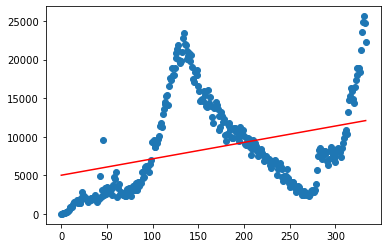

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.plot(X, model.predict(X),'r')

In [13]:


X = X.values

In [14]:
y = y.values

In [15]:
from sklearn.model_selection import train_test_split #แบ่งส่วน test และ train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train) #R-square

0.4540988568566592

In [17]:
from sklearn.preprocessing import PolynomialFeatures #เลือกใข้ Polynomial เพื่อให้ predic ได้แม่นยำมากขึ้น
poly_features = PolynomialFeatures(degree=12)  #เลือกใช้ degree 12 เพราะ R-square สูง และกราฟที่ได้แม่นยำมากขึ้น
X_poly = poly_features.fit_transform(X_train)



In [18]:
model2 = LinearRegression()
model2.fit(X_poly,y_train)

LinearRegression()

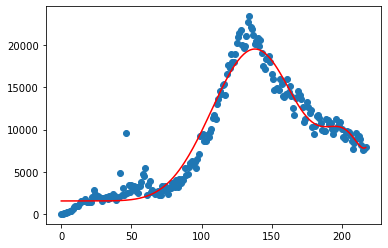

In [19]:
plt.scatter(X,y)
plt.plot(X , model2.predict(poly_features.fit_transform(X)),'r')

In [20]:
model2.score(X_poly,y_train) #R-square

0.9507501683746679

In [21]:
import numpy as np #สร้างข้อมูล เพื่อ predict 8 วัน
data_pred = np.arange(221, 229, 1).reshape(-1,1)

In [22]:
model2.predict(poly_features.fit_transform(data_pred))

array([ 9691.62852681, 10701.49610686, 12024.51159048, 13715.8219769 ,
       15837.23489916, 18457.80322468, 21654.44830739, 25512.62384915])

x4plot_poly = poly_features.fit_transform(X_poly)
y_poly_pred_plot = model.predict(x4plot_poly)

In [23]:
model2.predict(poly_features.fit_transform([[217]]))

array([7884.10575408])